<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 3: Practical - Logistic Regression <br> <br>
<font color=686880 size=4>
    TAs: Ali Salesi - Alireza Dehghanpour - Arman Malekzadeh
    
____

### Full Name : Erfan Sadraiye
### Student Number : 99101835
### Colab Link: https://colab.research.google.com/drive/1Iyfa-mYq3kqOzRskK88wMksYz2hSXjC5?usp=sharing
___

## 1. Introduction (10 points)
The datasets consist of several medical predictor(independent) variables and one target (dependent) variable, "Outcome". Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
  * Pregnancies
  * Glucose
  * BloodPressure
  * SkinThickness
  * Insulin
  * BMI
  * DiabetesPedigreeFunction
  * Age


First, we perform some data exploration to get a better understanding of the data. Then, we perform some data preprocessing to prepare the data for the regression model. Finally, we train a regression model to predict the outcome.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve


In [2]:
!wget https://github.com/sharif-ml/sharif-ml.github.io/raw/main/assignments/diabet-train.csv

--2023-04-28 15:36:46--  https://github.com/sharif-ml/sharif-ml.github.io/raw/main/assignments/diabet-train.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sharif-ml/sharif-ml.github.io/main/assignments/diabet-train.csv [following]
--2023-04-28 15:36:46--  https://raw.githubusercontent.com/sharif-ml/sharif-ml.github.io/main/assignments/diabet-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20859 (20K) [text/plain]
Saving to: ‘diabet-train.csv.2’

diabet-train.csv.2  100%[===================>]  20.37K  --.-KB/s    in 0s      

2023-04-28 15:36:46 (112 MB/s) - ‘diabet-train.csv.2’ sa

TODO: Load the dataset as a dataframe. Then, check for any null values. Remove the rows containing them. Finally, display the first 10 rows.

In [3]:
df = pd.read_csv('diabet-train.csv')
df = df.dropna()
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


TODO: Calculate the mean, standard deviation, min and max value for each column.

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.818314,120.399709,68.816860,20.437500,79.325581,31.862500,0.475683,33.138081,0.343023
std,3.359206,32.335016,19.412061,15.998604,115.199903,7.945238,0.338147,11.828338,0.475065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.075000,0.239750,24.000000,0.000000
50%,3.000000,116.000000,71.000000,23.000000,36.000000,32.000000,0.375500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.425000,0.632500,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Data Exploration (10 points)
In this section, we perform some data exploration to get a better understanding of the data.
First, we draw heatmaps to see the correlation between the features.
Then we draw pairplots to see the distribution of the features.

TODO: Draw a heatmap based on the correlation between the features (hint: you can use `seaborn`)

<Axes: >

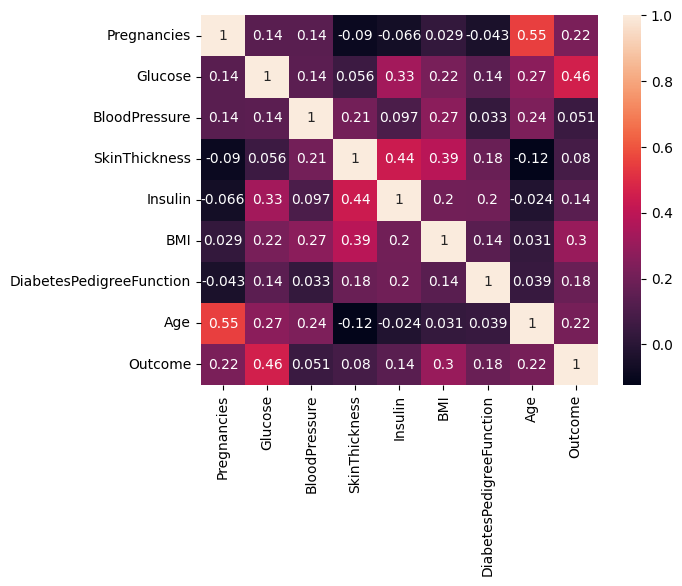

In [5]:
sns.heatmap(df.corr(), annot=True)

TODO: Draw the pairplot associated with the dataframe using `seaborn`.

In [6]:
sns.pairplot(df)

sns.pairplot(df, hue='Outcome')

Output hidden; open in https://colab.research.google.com to view.

I did some data preprocessing

In [7]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

X = df.drop('Outcome', axis=1).to_numpy()
y = df['Outcome'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)


## 3. SKLearn Regression Model (15 points)

### 3.1 Logistic Regression
In this section, we perform logistic regression to predict the outcome.
Then we draw confusion matrix to see the accuracy of the model.

TODO: Train a logistic regression model using `sklearn`. Use 20% of the data for the testing phase, and the remaining for the training phase.

In [8]:
sk_logistic_reg_model = SKLogisticRegression()
sk_logistic_reg_model.fit(X_train, y_train)

LogisticRegression()

## 4. Custom Regression Model (30 points)
First, we define base model for regression model.

### 4.1 Gradient Descent Logistic Regression Model

In [9]:
## DO NOT CHANGE THE CONTENTS OF THIS CELL

from abc import ABC, abstractmethod


class BaseModel(ABC):
    def __init__(self, n_features):
        self.N = n_features
        self.beta = np.zeros((self.N+1,))

    @abstractmethod
    def fit(self, X_train, y_train):
        raise NotImplementedError('must override fit')

    @abstractmethod
    def predict(self, X_test):
        raise NotImplementedError('must override predict')

In [10]:
class GDModel(BaseModel):
    def __init__(self, n_features, max_iter=50000, lr=0.0001, tol=1e-6, momentum=0.9):
        super().__init__(n_features)
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.momentum = momentum

    @abstractmethod
    def loss(self, X, y):
        raise NotImplementedError("must override loss")

    @abstractmethod
    def loss_derivative(self, X, y):
        raise NotImplementedError("must override loss derivative")

    def fit(self, X_train, y_train):
        X_train_new = np.concatenate(
            (X_train, np.ones((X_train.shape[0], 1))), axis=1)
        last_loss = 0
        momentum = 0
        for _ in range(self.max_iter):
            loss = self.loss(X_train_new, y_train)
            if abs(loss - last_loss) < self.tol:
                break
            last_loss = loss
            dl = self.loss_derivative(X_train_new, y_train) + self.momentum * momentum
            momentum = dl
            self.beta = self.beta - self.lr * dl

TODO: Imeplement the Logistic Regression model. For this class, the only things you have to change are the definitions of the following functions: `loss`, `loss_derivative`, and `predict`. 
<br>
Note: Some basic explanations about the concept of "gradient descent" will be given to you in a TA session very soon. However, completing this task doesn't necessarily depend on being familiar with that concept.

In [11]:
class GDLogisticRegression(GDModel):
    def __init__(self, n_features, **kwargs):
        super().__init__(n_features, **kwargs)
        self.beta = np.random.normal(0, 1 / np.sqrt(self.N), (self.N + 1))

    def loss(self, X, y):
        y_power = -np.matmul(X, self.beta)  # -X @ beta = log(exp(-X @ beta))
        log_y_pred = np.logaddexp(0, y_power)  # log(1 + exp(-y_power))
        return -np.mean((1 - y) * (y_power - log_y_pred) + y * -log_y_pred)
        
    def loss_derivative(self, X, y):
        y_power = -np.matmul(X, self.beta)
        log_y_pred = np.logaddexp(0, y_power)
        y_pred = np.exp(-log_y_pred)
        return np.matmul(y_pred - y, X)

    def predict(self, X):
        X_new = np.concatenate(
            (X, np.ones((X.shape[0], 1))), axis=1)
        y_power = -np.matmul(X_new, self.beta)
        log_y_pred = np.logaddexp(0, y_power)
        y_pred = np.exp(-log_y_pred)
        return y_pred

TODO: Implement the Logistic Regression Model. This time, use Pytorch!

In [12]:
# DO NOT CHANGE THE CONTENT OF THIS CELL

import torch

class GDTorchModel(BaseModel):
    def __init__(self, n_features, max_iter=50000, init_lr=0.0001):
        super().__init__(n_features)
        self.max_iter = max_iter
        self.init_lr = init_lr
        self.optimizer = None
        self.scheduler = None

    @abstractmethod
    def loss(self, X, y):
        raise NotImplementedError("must override loss")

    def fit(self, X_train, Y_train):
        for _ in range(self.max_iter):
            loss = self.loss(X_train, Y_train)
            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()
            self.scheduler.step(loss)

Note: Just change the definitions of `loss` and `predict`.

In [13]:
class GDTorchLogisticRegression(GDTorchModel):
    def __init__(self, n_features, **kwargs):
        super().__init__(n_features, **kwargs)
        self.beta = torch.randn(self.N+1, requires_grad=True)
        self.optimizer = torch.optim.Adam([self.beta], lr=0.01)
        self.scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'min', patience=1000, factor=0.5)

    def loss(self, X, y):
        #TODO: return binary cross entropty loss using torch.nn.BCELoss
        loss_fn = torch.nn.BCELoss()
        X_new = torch.cat([X, torch.ones(X.shape[0], 1)], dim=1)
        y_pred = torch.sigmoid(torch.matmul(X_new, self.beta))
        loss = loss_fn(y_pred, y)
        return loss

    def predict(self, X):
        #TODO: predict probability of class
        X_new = torch.cat((X, torch.ones((X.shape[0], 1))), dim=1)
        y_pred = torch.sigmoid(torch.matmul(X_new, self.beta))
        return y_pred.detach().numpy()

TODO: Predict the "Outcome" for the testing samples using all of the models (the one you trained using `sklearn` and the other ones for which you used your own code).

In [14]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).float()
y_test_tensor = torch.from_numpy(y_test).float()

In [15]:
y_pred_sklearn_prob = sk_logistic_reg_model.predict_proba(X_test)[:,1]

In [16]:
gd_logistic_reg_model = GDLogisticRegression(X_train.shape[1])
gd_logistic_reg_model.fit(X_train, y_train)
y_pred_gd_logistic_reg_prob = gd_logistic_reg_model.predict(X_test)

In [17]:
gd_torch_logistic_reg_model = GDTorchLogisticRegression(X_train.shape[1])
gd_torch_logistic_reg_model.fit(X_train_tensor, y_train_tensor)
y_pred_gd_torch_logistic_reg_prob = gd_torch_logistic_reg_model.predict(X_test_tensor)

# Evaluation (20 points)

TODO: Calculate `precision`, `recall`, and `f1-score`, and the `confusion_matrix` using your own code. Do this for the predictions given by both of the models.

In [18]:
class classification_full_report():

    def __init__(self, y_true, y_pred):
        '''
        Parameters:
            y_true : 1d array-like, or label indicator array
                    Ground truth (correct) target values.
            y_pred : 1d array-like, or label indicator array
                    Estimated targets as returned by a classifier.

        '''
        self.y_true = y_true
        self.y_pred = y_pred
    
    def f1_score(self):
        '''
        Returns:
            f1: the f1-score calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        classes = np.unique(self.y_true)
        f1s = []
        for c in classes:
            TP = np.sum((self.y_true == c) & (self.y_pred == c))
            FP = np.sum((self.y_true != c) & (self.y_pred == c))
            FN = np.sum((self.y_true == c) & (self.y_pred != c))
            f1s.append(2 * TP / (2 * TP + FP + FN))
        return np.mean(f1s)

    def precision(self):
        '''
        Returns:
            precision: the precision calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        classes = np.unique(self.y_true)
        precisions = []
        for c in classes:
            TP = np.sum((self.y_true == c) & (self.y_pred == c))
            FP = np.sum((self.y_true != c) & (self.y_pred == c))
            precisions.append(TP / (TP + FP))
        return np.mean(precisions)

    def recall(self):
        '''
        Returns:
            precision: the precision calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        classes = np.unique(self.y_true)
        recalls = []
        for c in classes:
            TP = np.sum((self.y_true == c) & (self.y_pred == c))
            FN = np.sum((self.y_true == c) & (self.y_pred != c))
            recalls.append(TP / (TP + FN))
        return np.mean(recalls)

    def confusion_matrix(self):
        '''
        Returns:
            precision: the confusion matrix calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        classes = np.unique(self.y_true)
        confusion_matrix = np.zeros((len(classes), len(classes)))
        for i, c1 in enumerate(classes):
            for j, c2 in enumerate(classes):
                confusion_matrix[i, j] = np.sum((self.y_true == c1) & (self.y_pred == c2))
        return confusion_matrix

# Finding the right Threshold (15 points)

TODO: Plot the "Precision-Recall Curve".

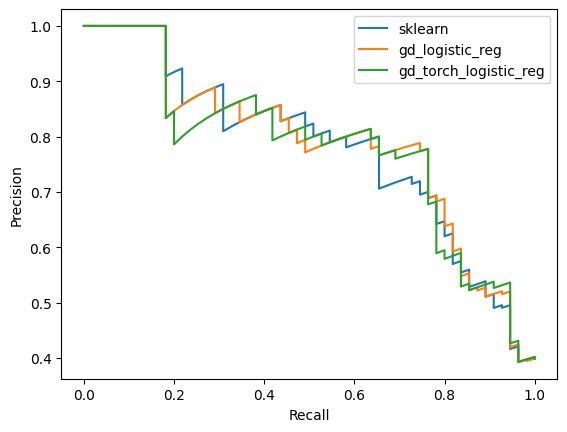

In [19]:
from sklearn.metrics import precision_recall_curve

precision_sklearn, recall_sklearn, thresholds_sklearn = precision_recall_curve(y_test, y_pred_sklearn_prob)
precision_gd_logistic_reg, recall_gd_logistic_reg, thresholds_gd_logistic_reg = precision_recall_curve(y_test,
                                                                                                       y_pred_gd_logistic_reg_prob)
precision_gd_torch_logistic_reg, recall_gd_torch_logistic_reg, thresholds_gd_torch_logistic_reg = precision_recall_curve(
    y_test, y_pred_gd_torch_logistic_reg_prob)

plt.plot(recall_sklearn, precision_sklearn, label='sklearn')
plt.plot(recall_gd_logistic_reg, precision_gd_logistic_reg, label='gd_logistic_reg')
plt.plot(recall_gd_torch_logistic_reg, precision_gd_torch_logistic_reg, label='gd_torch_logistic_reg')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

TODO: Based on the above curve, calculate the threshold minimizing the absolute difference between precision and recall.

In [20]:
def find_best_threshold(precision, recall, thresholds):
    best_threshold = thresholds[np.argmin(np.abs(precision - recall))]
    return best_threshold


best_threshold_sklearn = find_best_threshold(precision_sklearn, recall_sklearn, thresholds_sklearn)
best_threshold_gd_logistic_reg = find_best_threshold(precision_gd_logistic_reg, recall_gd_logistic_reg,
                                                     thresholds_gd_logistic_reg)
best_threshold_gd_torch_logistic_reg = find_best_threshold(precision_gd_torch_logistic_reg,
                                                           recall_gd_torch_logistic_reg,
                                                           thresholds_gd_torch_logistic_reg)

print('best_sklearn_threshold: ', best_threshold_sklearn)
print('best_gd_logistic_reg_threshold: ', best_threshold_gd_logistic_reg)
print('best_gd_torch_logistic_reg_threshold: ', best_threshold_gd_torch_logistic_reg)


best_sklearn_threshold:  0.3296469942294755
best_gd_logistic_reg_threshold:  0.30565945394531285
best_gd_torch_logistic_reg_threshold:  0.30230668


In [21]:

y_pred_sklearn= (y_pred_sklearn_prob > best_threshold_sklearn).astype(int)
y_pred_gd_logistic_reg = (y_pred_gd_logistic_reg_prob > best_threshold_gd_logistic_reg).astype(int)
y_pred_gd_torch_logistic_reg = (y_pred_gd_torch_logistic_reg_prob > best_threshold_gd_torch_logistic_reg).astype(int)

print('sklearn:')
print('Confusion Matrix :\n',classification_full_report(y_test, y_pred_sklearn).confusion_matrix())
print('F1 Score : ',classification_full_report(y_test, y_pred_sklearn).f1_score())
print('Precision : ',classification_full_report(y_test, y_pred_sklearn).precision())
print('Recall : ',classification_full_report(y_test, y_pred_sklearn).recall())
print()
print('gd_logistic_reg:')
print('Confusion Matrix :\n',classification_full_report(y_test, y_pred_gd_logistic_reg).confusion_matrix())
print('F1 Score : ',classification_full_report(y_test, y_pred_gd_logistic_reg).f1_score())
print('Precision : ',classification_full_report(y_test, y_pred_gd_logistic_reg).precision())
print('Recall : ',classification_full_report(y_test, y_pred_gd_logistic_reg).recall())
print()
print('gd_torch_logistic_reg:')
print('Confusion Matrix :\n',classification_full_report(y_test, y_pred_gd_torch_logistic_reg).confusion_matrix())
print('F1 Score : ',classification_full_report(y_test, y_pred_gd_torch_logistic_reg).f1_score())
print('Precision : ',classification_full_report(y_test, y_pred_gd_torch_logistic_reg).precision())
print('Recall : ',classification_full_report(y_test, y_pred_gd_torch_logistic_reg).recall())

sklearn:
Confusion Matrix :
 [[68. 15.]
 [16. 39.]]
F1 Score :  0.7649837938801296
Precision :  0.7658730158730158
Recall :  0.764184008762322

gd_logistic_reg:
Confusion Matrix :
 [[71. 12.]
 [13. 42.]]
F1 Score :  0.8104708015162336
Precision :  0.8115079365079365
Recall :  0.8095290251916758

gd_torch_logistic_reg:
Confusion Matrix :
 [[71. 12.]
 [13. 42.]]
F1 Score :  0.8104708015162336
Precision :  0.8115079365079365
Recall :  0.8095290251916758


# Kaggle Competition

In [22]:

test_df = pd.read_csv('assignment3-test-data.csv')

X_kaggle = test_df.drop(columns=['ID'])
minmax_scaler = MinMaxScaler()
X_kaggle = pd.DataFrame(scaler.fit_transform(X_kaggle), columns=X_kaggle.columns).to_numpy()
X_kaggle_tensor = torch.from_numpy(X_kaggle).float()
y_kaggle_pred_sklearn_prob = sk_logistic_reg_model.predict_proba(X_kaggle)[:,1]
y_kaggle_pred_gd_logistic_reg_prob = gd_logistic_reg_model.predict(X_kaggle)
y_kaggle_pred_gd_torch_logistic_reg_prob = gd_torch_logistic_reg_model.predict(X_kaggle_tensor)

y_kaggle_pred_sklearn = (y_kaggle_pred_sklearn_prob > best_threshold_sklearn).astype(int)
y_kaggle_pred_gd_logistic_reg = (y_kaggle_pred_gd_logistic_reg_prob > best_threshold_gd_logistic_reg).astype(int)
y_kaggle_pred_gd_torch_logistic_reg = (
        y_kaggle_pred_gd_torch_logistic_reg_prob > best_threshold_gd_torch_logistic_reg).astype(
    int)

y_kaggle_pred_sklearn_df = pd.DataFrame(y_kaggle_pred_sklearn, columns=['Outcome'])
y_kaggle_pred_sklearn_df['ID'] = np.arange(1, y_kaggle_pred_sklearn_df.shape[0] + 1)
y_kaggle_pred_sklearn_df.to_csv('y_kaggle_pred_sklearn.csv', index=False)

y_kaggle_pred_gd_logistic_reg_df = pd.DataFrame(y_kaggle_pred_gd_logistic_reg, columns=['Outcome'])
y_kaggle_pred_gd_logistic_reg_df['ID'] = np.arange(1, y_kaggle_pred_gd_logistic_reg_df.shape[0] + 1)
y_kaggle_pred_gd_logistic_reg_df.to_csv('y_kaggle_pred_gd_logistic_reg.csv', index=False)

y_kaggle_pred_gd_torch_logistic_reg_df = pd.DataFrame(y_kaggle_pred_gd_torch_logistic_reg, columns=['Outcome'])
y_kaggle_pred_gd_torch_logistic_reg_df['ID'] = np.arange(1, y_kaggle_pred_gd_torch_logistic_reg_df.shape[0] + 1)
y_kaggle_pred_gd_torch_logistic_reg_df.to_csv('y_kaggle_pred_gd_torch_logistic_reg.csv', index=False)

print("DONE!")

DONE!


Link: https://www.kaggle.com/t/1013891ffec9479dadd5023e56c04f30